# Machine Learning fundamentals

## Scikit learn

### Import

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
model = LinearRegression()

In [3]:
data = pd.read_csv('../data/ML_Houses_dataset.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Linear modeling

In [4]:
live_data = data[['GrLivArea','SalePrice']]
live_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


### Exploration

In [5]:
X = live_data[['GrLivArea']]
# full_X = data.drop(columns='SalePrice')
y = live_data.SalePrice

model.fit(X, y);

X can have multiple *features*, all of them have to be numeric (no categorical, no `NaN`).
If there are multiple *features*, `coef_` will have multiple values.

X must be a DataFrame, cannot be a pd.Series

In [6]:
model.predict(X)

array([201669.98234688, 154625.82686213, 209650.68729518, ...,
       194319.33305239, 256169.79640175,  92670.35423714])

$R^2$ calculation

In [7]:
model.score(X, y)

0.48960426399689116

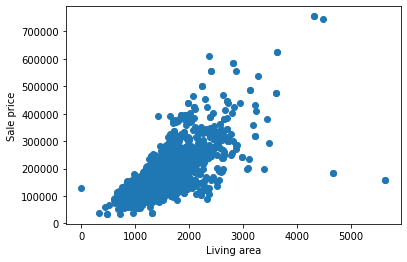

In [8]:
plt.scatter(data.GrLivArea, data.SalePrice);
plt.xlabel("Living area");
plt.ylabel("Sale price");

### Model Attributes

In [9]:
model.coef_

array([105.00927564])

In [10]:
model.intercept_ 

22104.12101002081

In [11]:
model.score(X, y)

0.48960426399689116

In [12]:
model.predict([[1000]])

/home/rsole/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([127113.39664561])

## Holdout Method

In [13]:
from sklearn.model_selection import train_test_split

Split and store directly into variables.

In [14]:
X = live_data[['GrLivArea']]
y = live_data['SalePrice']

# test_size defaults to 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.48755404101834254

Different `train` and `test` sets give different results.

### K-Fold Cross Validation

Dataset is split into K folds
For each split a *sub model* is trained and scored
The `average score` of all *sub models* is the **cross-validated** score of the model.

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
model = LinearRegression()

In [18]:
# cv defaults to 5
results = cross_validate(model, X, y)

In [19]:
pd.DataFrame(results)

,fit_time,score_time,test_score
0,0.003202,0.001015,0.558107
1,0.001319,0.000895,0.525933
2,0.001183,0.000990,0.504309
3,0.001208,0.000844,0.391175
4,0.001041,0.001227,0.452032


In [20]:
results['test_score'].mean()

0.4863112208425962

### Learning curves with Sklearn

In [23]:
from sklearn.model_selection import learning_curve

In [24]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]
train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), X=X, y=y,train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [28]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]
curve = learning_curve(estimator=LinearRegression(), X=X, y=y,train_sizes=train_sizes, cv=5)

train = [x.mean() for x in curve[1]]
test = [x.mean() for x in curve[2]]

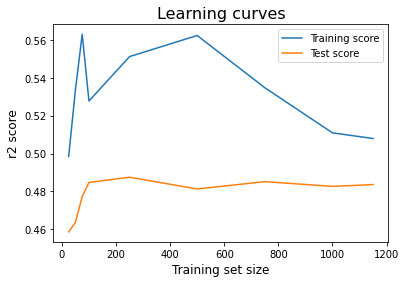

In [27]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 12)
plt.xlabel('Training set size', fontsize = 12)
plt.title('Learning curves', fontsize = 16)
plt.legend();